In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance

In [11]:
# Step 1: Load both datasets
df_phish = pd.read_csv("phishing_features_250_equal_dist.csv")
df_legit = pd.read_csv("legit_features_250.csv")

In [12]:
# Step 2: Standardize labels (to 0 = legit, 1 = phishing)
df_phish['label'] = 1
df_legit['label'] = 0

In [13]:
# Step 3: Drop URL column
df_phish = df_phish.drop(columns=["url"])
df_legit = df_legit.drop(columns=["url"])

In [14]:
# Optional: Keep only common columns if needed
common_cols = list(set(df_phish.columns) & set(df_legit.columns))
df_phish = df_phish[common_cols]
df_legit = df_legit[common_cols]

In [15]:
# Step 4: Combine datasets
df_combined = pd.concat([df_phish, df_legit], ignore_index=True)

In [16]:
# Step 5: Split features and label
X = df_combined.drop(columns=["label"])
y = df_combined["label"]

In [17]:
# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [18]:
# Step 7: Train RandomForest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [19]:
# Step 8: Evaluate
y_pred = model.predict(X_test)
print("\n✅ Classification Report:\n")
print(classification_report(y_test, y_pred))
print("\n✅ Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))


✅ Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.90      0.92        50
           1       0.90      0.94      0.92        50

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100


✅ Confusion Matrix:

[[45  5]
 [ 3 47]]


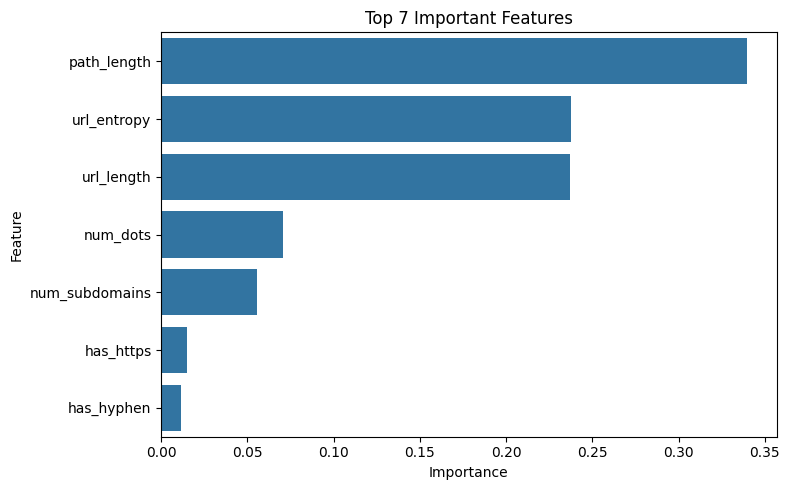

In [25]:
# Step 9: Feature Importance (Top 7 only)
importances = model.feature_importances_
feat_names = X.columns
sorted_idx = np.argsort(importances)[::-1]

# Extract top 7
top_n = 7
top_features = feat_names[sorted_idx][:top_n]
top_importances = importances[sorted_idx][:top_n]

# Plot top 7
plt.figure(figsize=(8,5))
sns.barplot(x=top_importances, y=top_features)
plt.title("Top 7 Important Features")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [26]:
# Step 10 (Optional): Cross-validation Accuracy
scores = cross_val_score(model, X, y, cv=5)
print(f"\n✅ Cross-Validation Accuracy: {scores.mean():.4f}")


✅ Cross-Validation Accuracy: 0.9111
